In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import missingno as ms

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
df.sum()

id                                                               17281572085
diagnosis                  MMMMMMMMMMMMMMMMMMMBBBMMMMMMMMMMMMMMMBMMMMMMMM...
radius_mean                                                         8038.429
texture_mean                                                        10975.81
perimeter_mean                                                      52330.38
area_mean                                                           372631.9
smoothness_mean                                                       54.829
compactness_mean                                                    59.37002
concavity_mean                                                     50.526811
concave points_mean                                                27.834994
symmetry_mean                                                       103.0811
fractal_dimension_mean                                              35.73184
radius_se                                                           230.5429

In [10]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [21]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [22]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [23]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [24]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


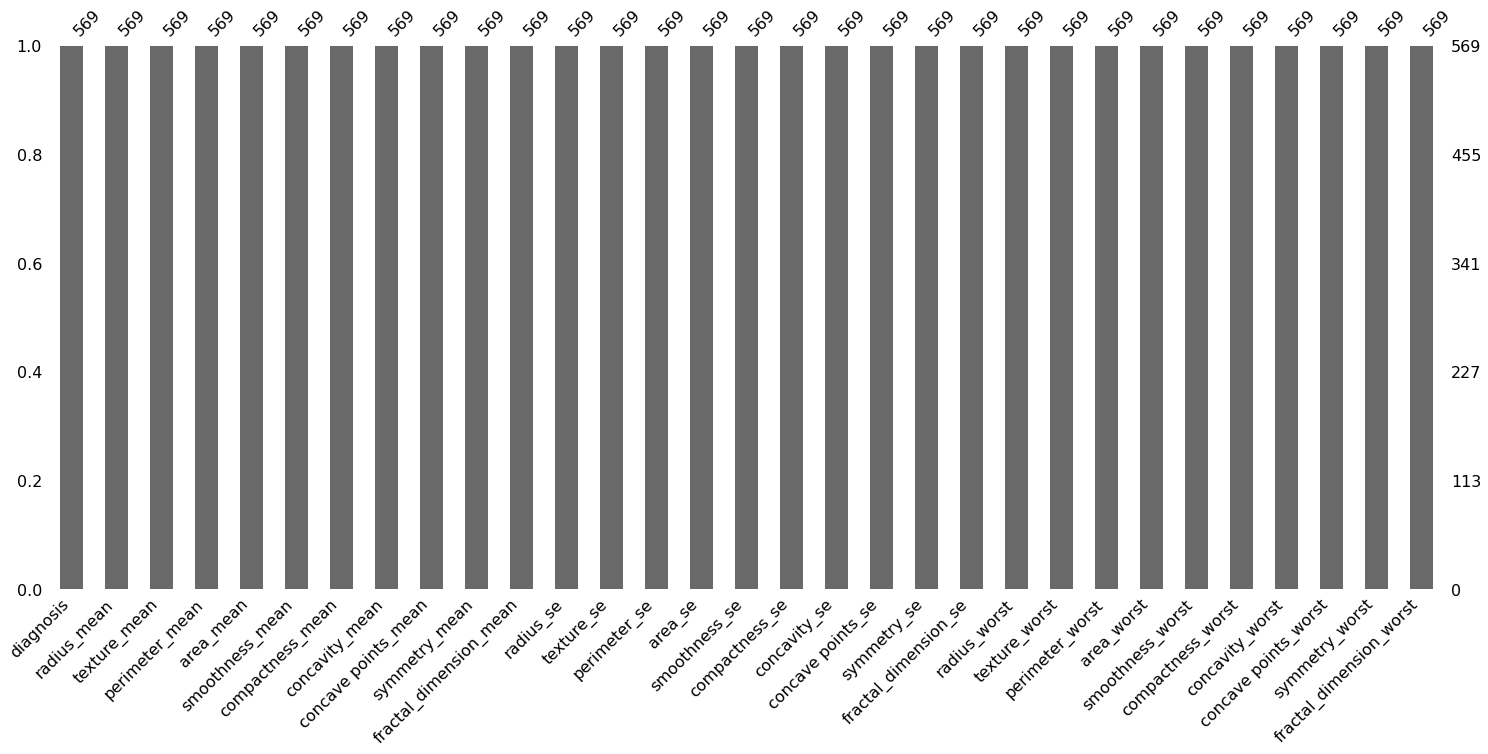

In [26]:
ms.bar(df)
plt.savefig('1.png')

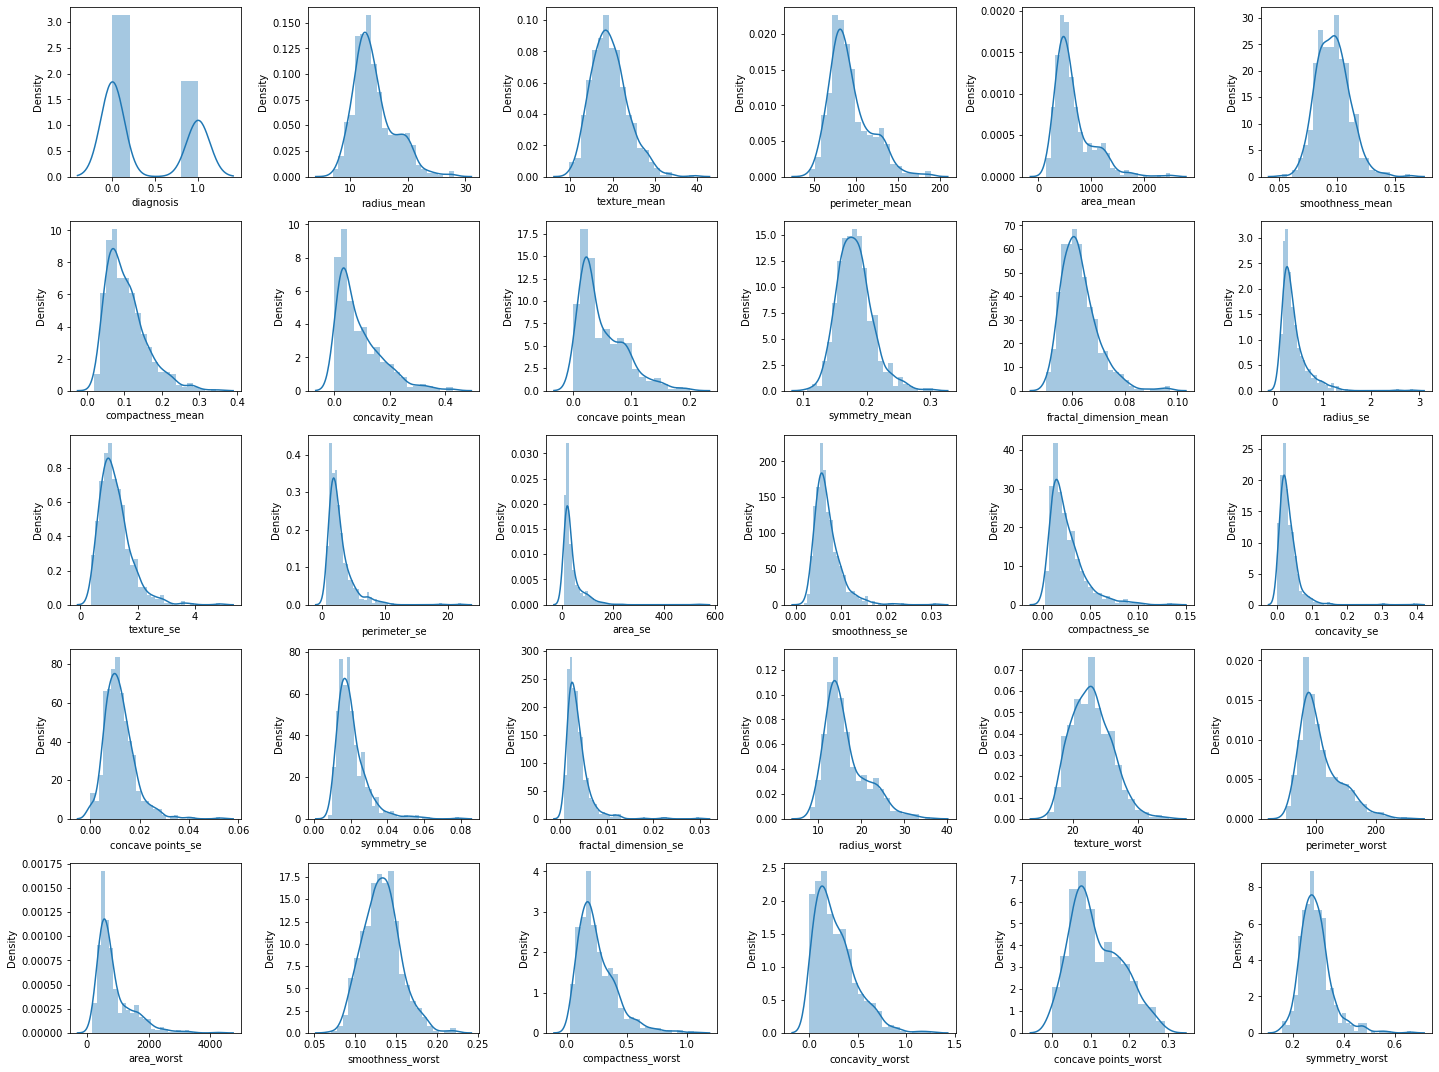

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()
plt.savefig('2.png')

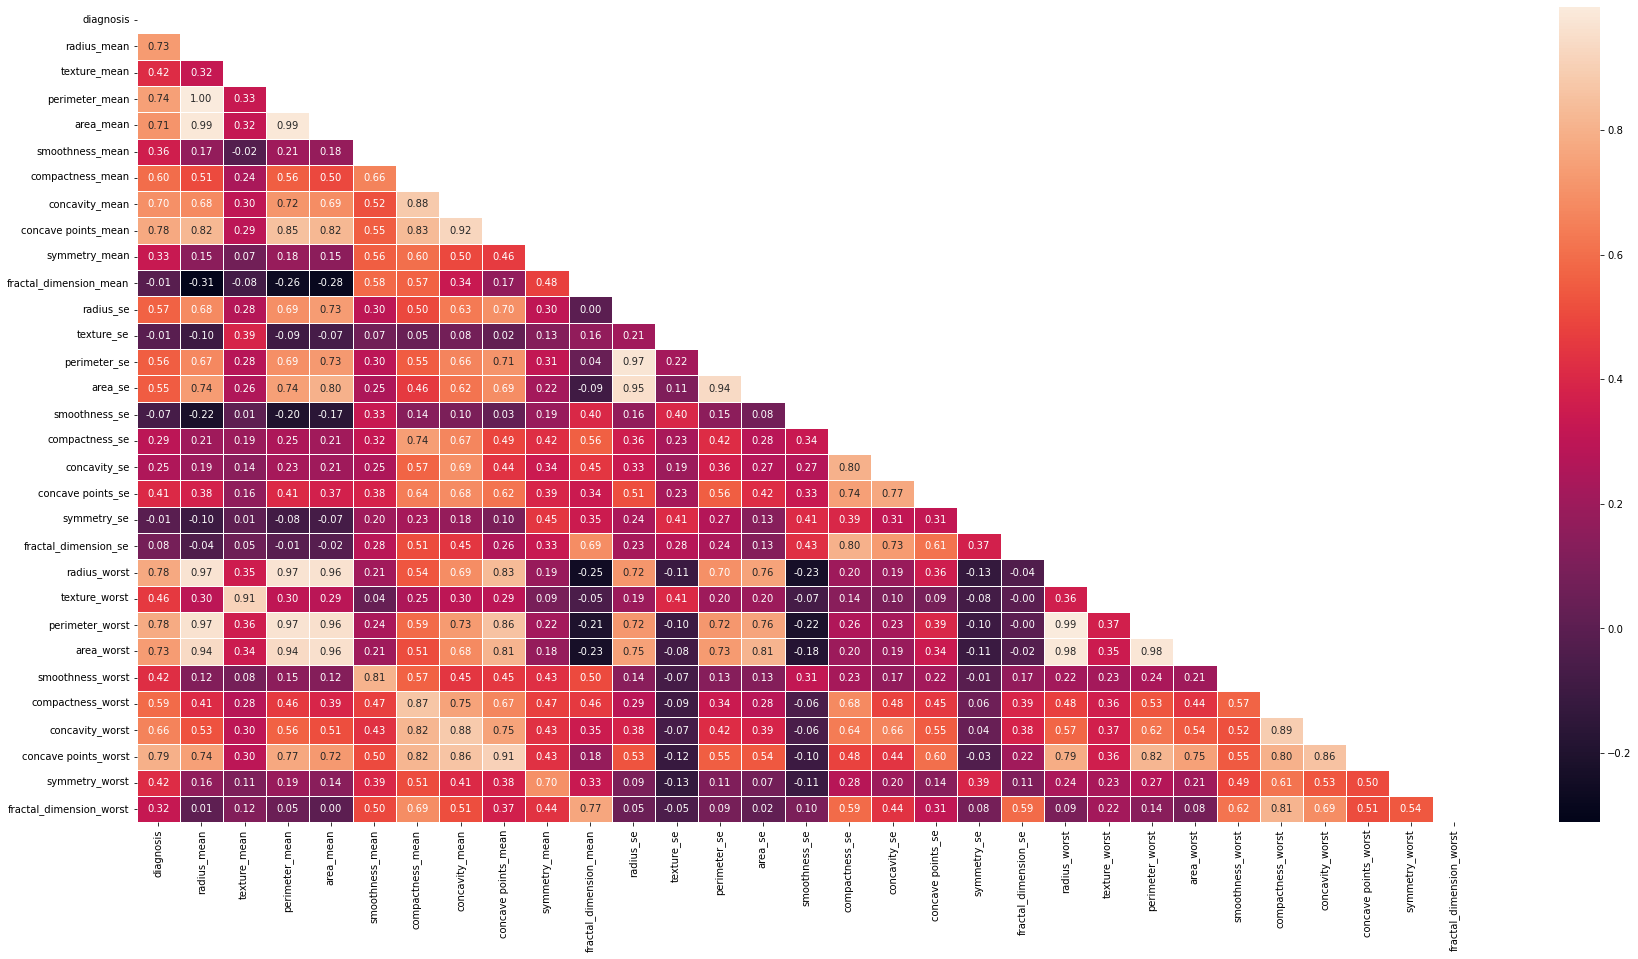

In [29]:
plt.figure(figsize=(30,15))
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(corr,mask = mask, linewidths = 1 , annot= True , fmt = ".2f")
plt.savefig('3.png')
plt.show()

In [30]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [32]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [44]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state= 0)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = log_reg.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test,log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


In [62]:
print(confusion_matrix(y_test,y_pred))

[[106   2]
 [  5  58]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn.predict(X_test)

In [66]:
print(accuracy_score(y_train,knn.predict(X_train)))
knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(knn_acc)

0.9623115577889447
0.935672514619883


In [67]:
print(confusion_matrix(y_pred,y_test))

[[105   8]
 [  3  55]]


In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [82]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [83]:
grid_search.best_index_

22

In [84]:
grid_search.best_estimator_

SVC(C=10, gamma=0.01)

In [85]:
grid_search.best_score_

0.9774683544303798

In [91]:
svc= SVC(C = 10, gamma= 0.01)
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [92]:
y_pred = svs.predict(X_test)

In [93]:
print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9874371859296482
0.9766081871345029


In [94]:
print(confusion_matrix(y_test,y_pred))

[[107   1]
 [  3  60]]


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [96]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}
grid_search = GridSearchCV(sgd,parameters,cv = 10, n_jobs = -1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [97]:
grid_search.best_estimator_

SGDClassifier(alpha=0.001, penalty='l1')

In [98]:
grid_search.best_index_

4

In [99]:
grid_search.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

In [100]:
grid_search.best_score_

0.9824358974358974

In [101]:
sgd = SGDClassifier(alpha = 0.001, loss = 'log', penalty = 'l2')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log')

In [102]:
y_pred = sgd.predict(X_test)

In [103]:
print(accuracy_score(y_train, sgd.predict(X_train)))

sgd_acc = accuracy_score(y_test, sgd.predict(X_test))
print(sgd_acc)

0.9899497487437185
0.9590643274853801


In [105]:
print(confusion_matrix(y_test,y_pred))

[[105   3]
 [  4  59]]


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}
grid_search = GridSearchCV(dtc,parameters,cv = 5, n_jobs= -1, verbose= 1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [108]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=21, splitter='random')

In [109]:
grid_search.best_index_

7057

In [110]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [111]:
grid_search.best_score_

0.967373417721519

In [112]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [113]:
y_pred = dtc.predict(X_test)

In [114]:
print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9723618090452262
0.9415204678362573


In [115]:
print(confusion_matrix(y_test,y_pred))

[[105   3]
 [  7  56]]


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [118]:
y_pred = rfc.predict(X_test)

In [119]:
print(accuracy_score(y_train,rfc.predict(X_train)))
rfc_acc = accuracy_score(y_test,y_pred)

0.9974874371859297


In [120]:
print(confusion_matrix(y_test,y_pred))

[[104   4]
 [  6  57]]


In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [122]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Logistic Regression', log_reg), ('K Nearest Neighbours', knn), ('Support Vector Classifier', svc),
               ('Decision Tree', dtc)]
vc = VotingClassifier(estimators= classifiers)
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Nearest Neighbours', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(C=10, gamma=0.01)),
                             ('Decision Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=28,
                                                     min_samples_split=8,
                                                     splitter='random'))])

In [123]:
y_pred = vc.predict(X_test)

In [125]:
print(accuracy_score(y_train,vc.predict(X_train)))
vc_acc = accuracy_score(y_test,y_pred)

0.9824120603015075


In [126]:
print(confusion_matrix(y_test,y_pred))

[[107   1]
 [  6  57]]


In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [129]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtc)
ada = AdaBoostClassifier(dtc,n_estimators= 180)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=28,
                                                    min_samples_split=8,
                                                    splitter='random'),
                   n_estimators=180)

In [130]:
y_pred = ada.predict(X_test)

In [131]:
print(accuracy_score(y_train,ada.predict(X_train)))
ada_acc = accuracy_score(y_test,y_pred)

1.0


In [132]:
print(confusion_matrix(y_test,y_pred))

[[108   0]
 [  4  59]]


In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {  'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]}
grid_search_gbc = GridSearchCV(gbc,parameters,cv = 5, n_jobs= -1, verbose= 1)
grid_search_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [136]:
grid_search_gbc.best_estimator_

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [137]:
grid_search_gbc.best_index_

23

In [138]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [139]:
grid_search_gbc.best_score_

0.9698417721518988

In [140]:
gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           n_estimators=200)

In [141]:
y_pred = gbc.predict(X_test)

In [142]:
print(accuracy_score(y_train,gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test,y_pred)

1.0


In [143]:
print(confusion_matrix(y_test,y_pred))

[[106   2]
 [  1  62]]


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [145]:
sgbc = GradientBoostingClassifier(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=0)

sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           random_state=0, subsample=0.9)

In [146]:
y_pred = sgbc.predict(X_test)

In [147]:
print(accuracy_score(y_train,sgbc.predict(X_train)))
sgbc_acc = accuracy_score(y_test,y_pred)

1.0


In [148]:
print(confusion_matrix(y_test,y_pred))

[[104   4]
 [  2  61]]


In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [152]:
from xgboost  import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [153]:
y_pred = xgb.predict(X_test)

In [154]:
print(accuracy_score(y_train,xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test,y_pred)

1.0


In [155]:
print(confusion_matrix(y_test,y_pred))

[[107   1]
 [  2  61]]


In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [158]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Voting Classifier', 'Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost'],
    'Score': [log_reg_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, rfc_acc, vc_acc, ada_acc, gbc_acc, sgbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Gradient Boosting Classifier,0.982456
10,XgBoost,0.982456
2,SVC,0.976608
7,Ada Boost Classifier,0.976608
9,Stochastic Gradient Boosting,0.964912
0,Logistic Regression,0.959064
3,SGD Classifier,0.959064
6,Voting Classifier,0.959064
4,Decision Tree Classifier,0.941520
5,Random Forest Classifier,0.941520
